In [17]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
import pickle 
warnings.simplefilter("ignore")

In [2]:
# Load data
data = pd.read_csv("Language Detection.csv")

In [18]:
model_path = "saved_model.pkl" 

In [3]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [33]:
# value count for each language
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Language

English       1385

French        1014

Spanish        819

Portugeese     739

Italian        698

Russian        692

Sweedish       676

Malayalam      594

Dutch          546

Arabic         536

Turkish        474

German         470

Tamil          469

Danish         428

Kannada        369

Greek          365

Hindi           63

Name: count, dtype: int64

In [35]:
# Check if a trained model exists
try:
   with open(model_path, 'rb') as file:
      model = pickle.load(file)
      print("Loaded model from:", model_path)
except FileNotFoundError:
   # Train model if it doesn't exist
   print("Model not found. Training a new model...")

   # Separate features
   X = data["Text"]
   y = data["Language"]

   # Encode categorical labels
   le = LabelEncoder()
   y = le.fit_transform(y)

   # Text Preprocessing
   def preprocess_text(text):
      """
      Preprocesses text by removing special characters, converting to lowercase.
      """
      text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
      text = re.sub(r'[[]]', ' ', text)
      text = text.lower()
      return text

   data_list = [preprocess_text(text) for text in X]

   # Feature Extraction (Bag of Words)
   cv = CountVectorizer()
   X = cv.fit_transform(data_list).toarray()

   # Train-Test Split
   x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

   # Train Model (Multinomial Naive Bayes)
   model = MultinomialNB()
   model.fit(x_train, y_train)

   # Save the trained model
   with open(model_path, 'wb') as file:
      pickle.dump(model, file)
      print("Model saved to:", model_path)


Loaded model from: saved_model.pkl


Model not found. Training a new model...

Model saved to: saved_model.pkl


In [36]:
y_pred = model.predict(x_test)

# Evaluation
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", ac)

Accuracy: 0.9816247582205029


Accuracy: 0.9816247582205029


### Confusion Matrix

In [37]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       103
           1       1.00      0.93      0.96        87
           2       1.00      0.97      0.99       112
           3       0.90      1.00      0.95       256
           4       0.99      1.00      0.99       223
           5       0.99      0.99      0.99        91
           6       1.00      0.99      0.99        74
           7       1.00      1.00      1.00        13
           8       0.99      1.00      0.99       136
           9       1.00      0.93      0.96        68
          10       0.99      0.99      0.99       126
          11       0.99      0.99      0.99       145
          12       1.00      0.99      0.99       145
          13       1.00      0.97      0.98       169
          14       0.97      0.98      0.98       133
          15       1.00      0.99      0.99        90
          16       1.00      0.95      0.97        97

    accuracy              

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       103
           1       1.00      0.93      0.96        87
           2       1.00      0.97      0.99       112
           3       0.90      1.00      0.95       256
           4       0.99      1.00      0.99       223
           5       0.99      0.99      0.99        91
           6       1.00      0.99      0.99        74
           7       1.00      1.00      1.00        13
           8       0.99      1.00      0.99       136
           9       1.00      0.93      0.96        68
          10       0.99      0.99      0.99       126
          11       0.99      0.99      0.99       145
          12       1.00      0.99      0.99       145
          13       1.00      0.97      0.98       169
          14       0.97      0.98      0.98       133
          15       1.00      0.99      0.99        90
          16       1.00      0.95      0.97        97

    accuracy                           0.98      2068
   macro avg       0.99      0.98      0.98      2068
weighted avg       0.98      0.98      0.98      2068



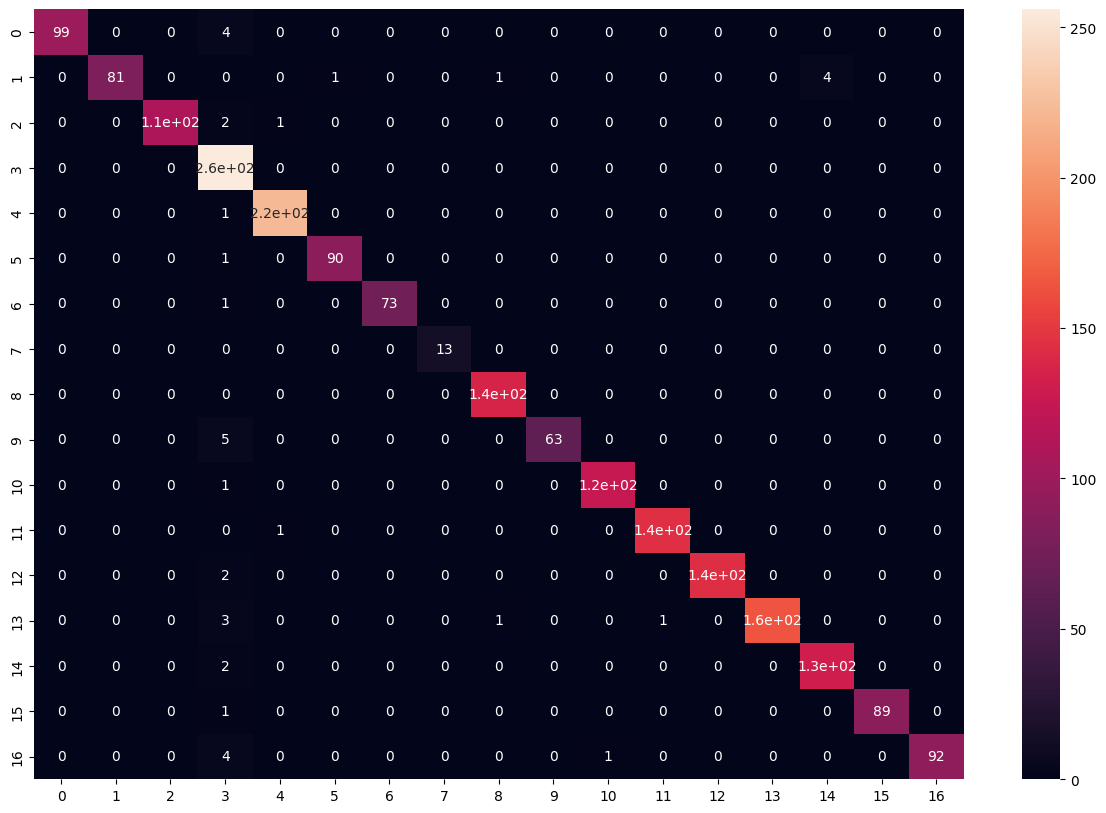

In [38]:
# Visualize confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.show()


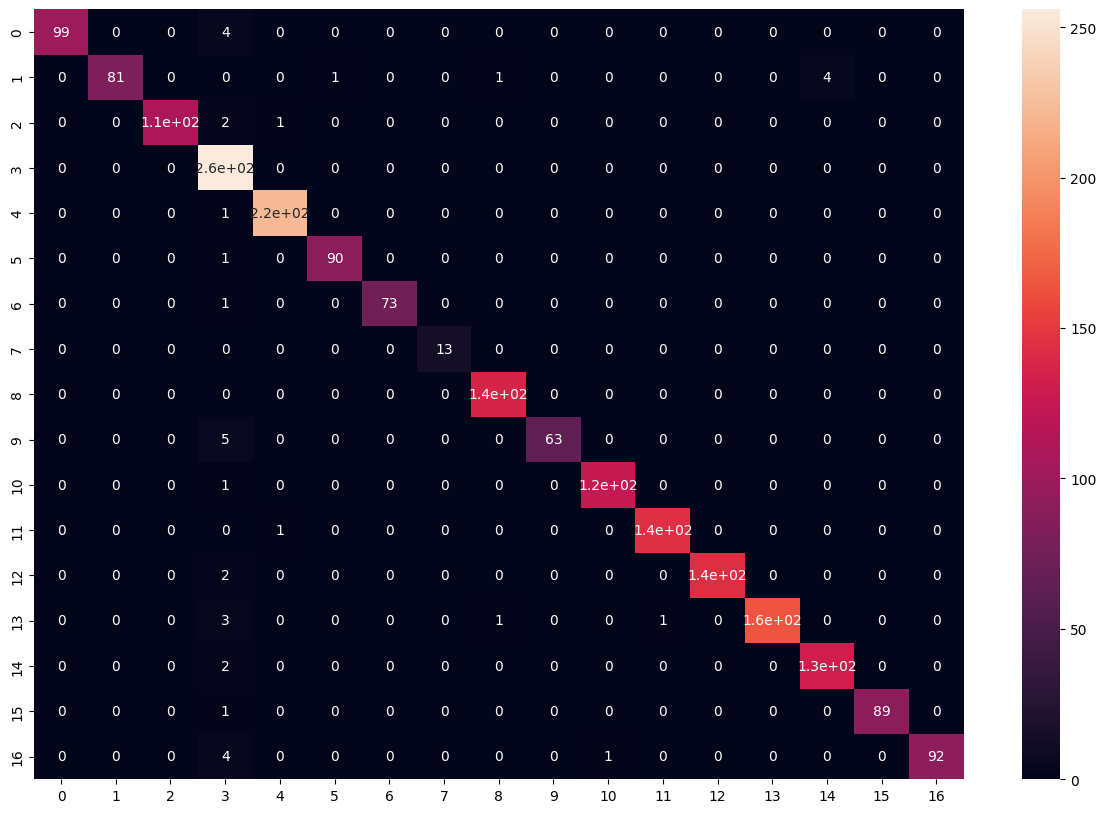

### Testing the Model with random sentences

In [39]:
custom_sentences = [
  "This is a sentence in English.",
  "Esta es una oración en español.",
  "Bonjour, je parle français.",
  "चाय पीने का मन कर रहा है",
  "कल रात बहुत तेज बारिश हुई"
]

In [40]:
# Prediction on custom sentences
def predicted_languages(sentences):
   preprocessed_sentences = [preprocess_text(text) for text in sentences]
   custom_data = cv.transform(preprocessed_sentences)
   predictions = model.predict(custom_data)

   # Decode predictions back to original labels using the encoder
   return le.inverse_transform(predictions)

In [41]:
predicted_languages = predicted_languages(custom_sentences)

# Print the results
for sentence, language in zip(custom_sentences, predicted_languages):
  print(f"Sentence: {sentence}")
  print(f"Predicted Language: {language}\n")

Sentence: This is a sentence in English.
Predicted Language: English

Sentence: Esta es una oración en español.
Predicted Language: Spanish

Sentence: Bonjour, je parle français.
Predicted Language: French

Sentence: चाय पीने का मन कर रहा है
Predicted Language: Hindi

Sentence: कल रात बहुत तेज बारिश हुई
Predicted Language: Hindi



Sentence: This is a sentence in English.
Predicted Language: English

Sentence: Esta es una oración en español.
Predicted Language: Spanish

Sentence: Bonjour, je parle français.
Predicted Language: French

Sentence: चाय पीने का मन कर रहा है
Predicted Language: Hindi

Sentence: कल रात बहुत तेज बारिश हुई
Predicted Language: Hindi

